## mesh_to_sdfのコードを変更して3DCNNようのデータを作成するための使い方

In [1]:
import os
import sys
import trimesh
import numpy as np
import pandas as pd
from tqdm import tqdm
from glob import glob

sys.path.append("./mesh_to_sdf/")

# mesh_to_sdfのモジュールから必要な関数をインポート
from utils import scale_to_unit_sphere
from mesh_to_sdf import sample_sdf_voxel  # 新しく作成した関数

# サンプルデータ内の全ての.objファイルのパスを取
car_file_dir = "./sample-data/*.obj"
filepaths = glob(car_file_dir, recursive=True)

In [2]:
# 今回はstanford bunnyのデータを使用して確認してみる

filepaths

['./sample-data/stanford_bunny.obj']

In [3]:
stanf_path = filepaths[0]

In [4]:
N = 24  # いくつの格子で区切るか

# 3次元データのload
mesh = trimesh.load(stanf_path)
mesh = scale_to_unit_sphere(mesh)

# 格子状の座標からSDFを計算
sdf_creator = sample_sdf_voxel(
    mesh,
    N=N,
    surface_point_method="scan",
    sign_method="normal",
    scan_count=100,
    scan_resolution=400,
    sample_point_count=10000000,
    normal_sample_count=200,
    min_size=0,
    return_gradients=False,
)

In [5]:
from copy import deepcopy

xyz = sdf_creator[0]
sdf = sdf_creator[1]

xyz.shape, sdf.shape  # 格子状の座標とSDFの値になっているか確認

((24, 24, 24, 3), (24, 24, 24))

### ちゃんとできているか可視化を行う

#### ※ pyrenderのライブラリをinstallしないといけません

### 全体図

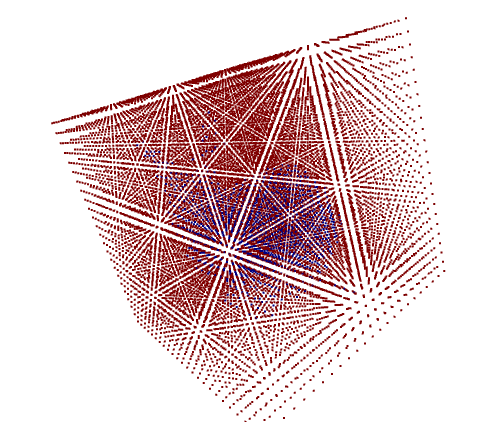

In [ ]:
import pyrender

xyz = sdf_creator[0]
sdf = sdf_creator[1]
points = xyz.reshape(-1, 3)
sdf = sdf.reshape(-1)

colors = np.zeros((len(points), 3))
colors[sdf < 0, 2] = 1
colors[sdf > 0, 0] = 1


cloud = pyrender.Mesh.from_points(points, colors=colors)
scene = pyrender.Scene()
scene.add(cloud)
pyrender.Viewer(scene, use_raymond_lighting=True, point_size=2)

### 内側だけ

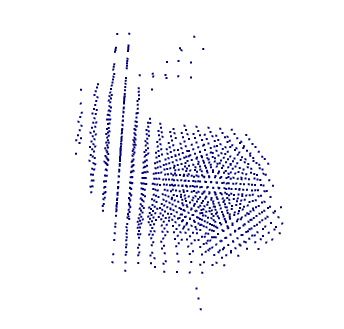

In [ ]:
xyz = sdf_creator[0]
sdf = sdf_creator[1]
points = xyz.reshape(-1, 3)
sdf = sdf.reshape(-1)

colors = np.zeros((len(points), 3))
colors[sdf < 0, 2] = 1
colors[sdf > 0, 0] = 1


# sdfが0以下のindexを取得
idx = np.where(sdf < 0)[0]
colors = colors[idx, :]
points = points[idx, :]
sdf = sdf[idx]


cloud = pyrender.Mesh.from_points(points, colors=colors)
scene = pyrender.Scene()
scene.add(cloud)
pyrender.Viewer(scene, use_raymond_lighting=True, point_size=2)

### 外側だけ

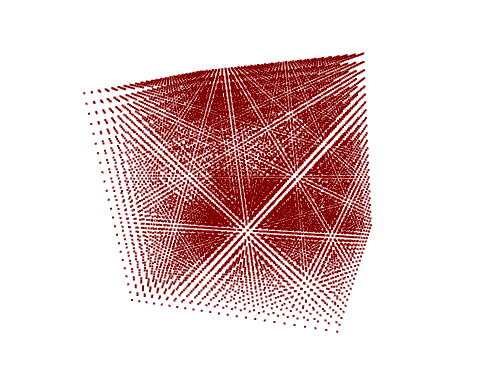

In [ ]:
xyz = sdf_creator[0]
sdf = sdf_creator[1]
points = xyz.reshape(-1, 3)
sdf = sdf.reshape(-1)

colors = np.zeros((len(points), 3))
colors[sdf < 0, 2] = 1
colors[sdf > 0, 0] = 1

# sdfが0以下のindexを取得
idx = np.where(sdf > 0)[0]
colors = colors[idx, :]
points = points[idx, :]
sdf = sdf[idx]


cloud = pyrender.Mesh.from_points(points, colors=colors)
scene = pyrender.Scene()
scene.add(cloud)
pyrender.Viewer(scene, use_raymond_lighting=True, point_size=2)